In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/ML/adult.csv')

In [5]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [9]:
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830       40.437456
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219       12.347429
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000       40.000000
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000       99.000000


In [11]:
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [15]:
X = df.drop('income', axis = 1)
y = df['income']

In [16]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model = GaussianNB()

In [19]:
model.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.7945647167204053


In [25]:
print("Accuracy Score:", accuracy_score(y_train,y_pred_train))

Accuracy Score: 0.7951090294840295


In [28]:
print("Classification Report:\n\n", classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4976
           1       0.64      0.30      0.41      1537

    accuracy                           0.79      6513
   macro avg       0.73      0.62      0.64      6513
weighted avg       0.77      0.79      0.77      6513



In [32]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[4716  260]
 [1078  459]]


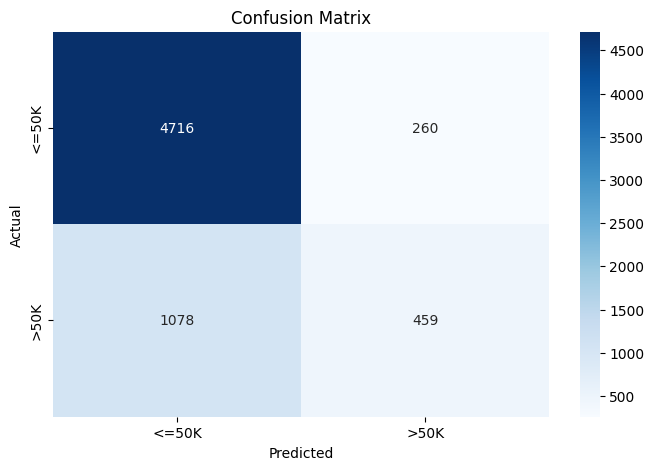

In [33]:
labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

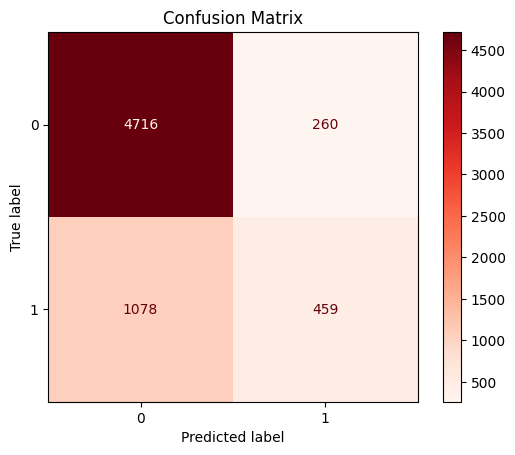

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

We used the Naive Bayes algorithm on the Adult dataset to predict whether a person earns more than $50K or not, based on their personal details like age, education, and job. This method was chosen because it is simple, fast, and works well with large datasets. The model gave us an accuracy of about 79%, meaning it correctly predicted income for most people. It worked well for people earning less than $50K but was not as good at finding those who earn more than $50K. This is likely because there are fewer high-income people in the data. Overall, Naive Bayes is a good starting model, but other methods might give better results.